In [129]:
import pandas as pd

df = pd.read_csv("a1_data.csv")
df

,A,B,C,D,E,F,G,H,I,J,K
0,3.179665,3.030625,3.222752,2.836624,3.386284,1.910165,2.179628,3.464657,3.705143,3.921797,3.566766
1,3.313155,3.127535,3.367189,2.799483,2.527001,2.359419,2.461049,3.394200,3.002324,3.487035,3.753581
2,3.531847,3.554489,3.441636,2.582776,2.730851,2.263097,2.461049,3.452962,3.531599,3.773342,3.254741
3,3.621384,3.828081,3.640896,2.704508,1.727649,1.855651,2.021082,3.570291,3.611415,3.725917,3.328318
4,3.285691,3.206716,2.992451,2.562289,3.011359,2.414187,2.612864,3.331957,3.143080,3.679484,3.874796
...,...,...,...,...,...,...,...,...,...,...,...
11667,3.793141,3.921324,3.895300,3.000136,2.883361,2.333931,2.847800,3.898225,2.699285,1.123815,2.824223
11668,3.469416,3.491603,3.629846,2.898924,2.700522,2.953265,3.093751,3.804530,2.699285,1.707091,2.824223
11669,3.550766,3.480149,3.653584,2.859884,2.535938,1.754421,2.606183,3.703122,2.699285,0.963030,3.125252
11670,3.641136,3.679161,3.137581,2.870503,2.706313,2.773593,2.882737,3.749889,4.347643,3.855321,3.211612


In [130]:
import numpy as np

X = df.values

In [131]:
import numpy as np
from sklearn.linear_model import LinearRegression, LassoLarsIC

def sortnregress(X):
    LR = LinearRegression()
    LL = LassoLarsIC(criterion='bic')

    d = X.shape[1]
    W = np.zeros((d, d))
    increasing = np.argsort(np.var(X, axis=0))
    print(increasing)
    for k in range(1, d):
        covariates = increasing[:k]
        target = increasing[k]
        LR.fit(X[:, covariates], X[:, target].ravel())
        weight = np.abs(LR.coef_)
        LL.fit(X[:, covariates] * weight, X[:, target].ravel())
        W[covariates, target] = LL.coef_ * weight
    return W


In [132]:
W1 = sortnregress(X)
W1

[ 1  0  7  2  8 10  6  4  5  3  9]


array([[ 0.        ,  0.        ,  0.19273552,  0.        ,  0.        ,
         0.        , -0.19065004,  0.08140949, -0.07473021, -0.44325614,
        -0.17540288],
       [ 0.78354559,  0.        , -0.19055202,  0.06223735,  0.        ,
         0.01782567,  0.23276964,  0.        ,  0.13096988,  0.4987106 ,
         0.14662184],
       [ 0.        ,  0.        ,  0.        ,  0.13126887,  0.16155825,
         0.        , -0.06555882,  0.        ,  0.        ,  0.        ,
        -0.03220655],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.03229376,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.24868515,  0.        ,
         0.02357204,  0.        ,  0.        ,  0.        ,  0.03344842,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.22641082,
         0.   

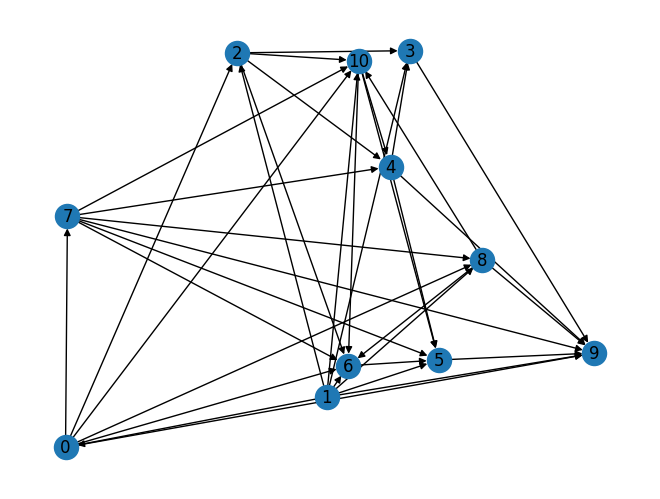

In [133]:
# visualize the matrix as a directed graph
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph(W1)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

In [134]:
import numpy as np
from sklearn.linear_model import Lasso, LinearRegression

def sortnregress(X):
    lasso = Lasso(alpha=0.01)

    d = X.shape[1]
    W = np.zeros((d, d))
    increasing = np.argsort(np.var(X, axis=0))
    print(increasing)
    for k in range(1, d):
        covariates = increasing[:k]
        target = increasing[k]
        lasso.fit(X[:, covariates], X[:, target].ravel())
        weight = np.abs(lasso.coef_)
        W[covariates, target] = weight
    return W

In [135]:
W2 = sortnregress(X)

[ 1  0  7  2  8 10  6  4  5  3  9]


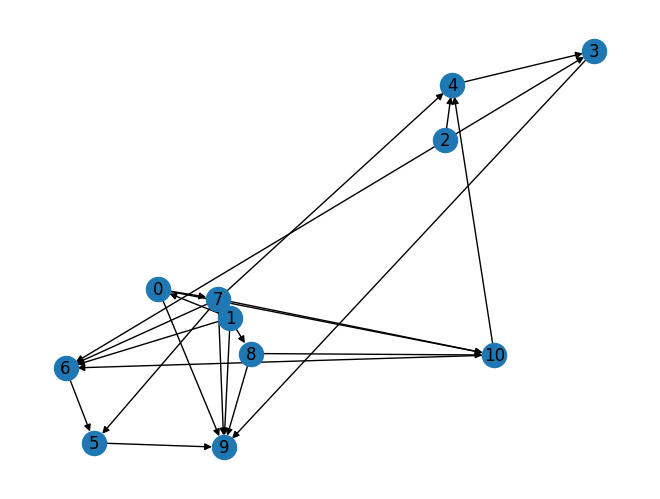

In [136]:

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph(W2)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

In [137]:
df_pred = pd.DataFrame()
df_res = pd.DataFrame()
for col in df.columns:
    weights = W1[:, df.columns.get_loc(col)]
    print(col, weights)
    # predict from other columns and weights
    df_pred[col] = weights @ df.values.T
    # calculate the residual
    df_res[col] = df[col] - df_pred[col]


A [0.         0.78354559 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
B [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
C [ 0.19273552 -0.19055202  0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]
D [0.         0.06223735 0.13126887 0.         0.24868515 0.
 0.         0.         0.         0.         0.        ]
E [0.         0.         0.16155825 0.         0.         0.
 0.         0.14517445 0.         0.         0.04272091]
F [0.         0.01782567 0.         0.         0.02357204 0.
 0.99554889 0.06897656 0.         0.         0.03558712]
G [-0.19065004  0.23276964 -0.06555882  0.          0.          0.
  0.          0.30371937 -0.03684325  0.         -0.07803338]
H [0.08140949 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
I [-0.07473021  0.13096988  0.          0.          0.          0.
  0.          0.16957976  0.          0.        

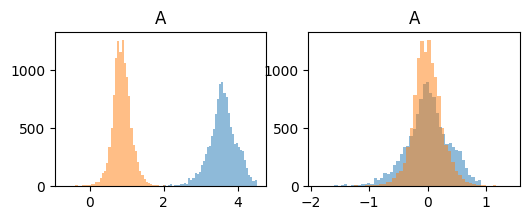

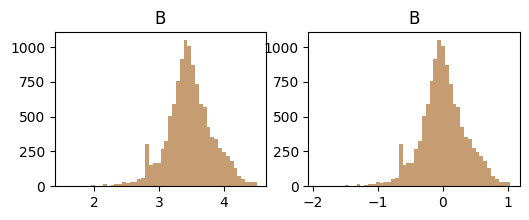

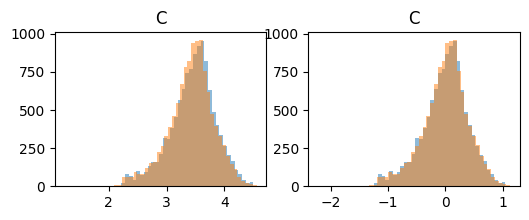

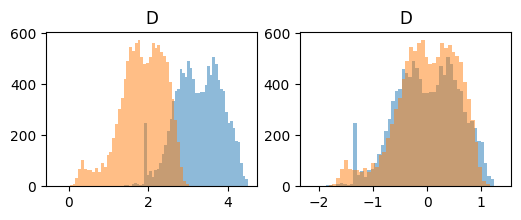

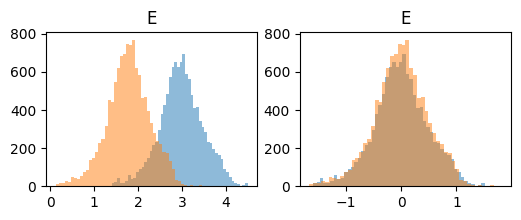

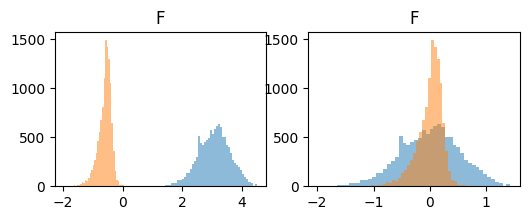

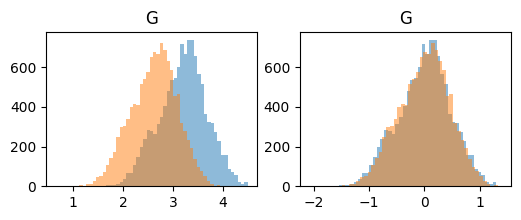

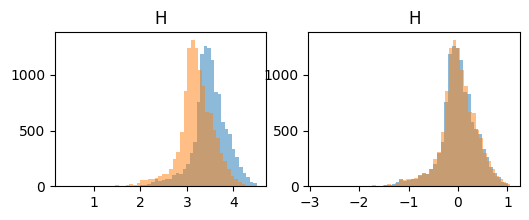

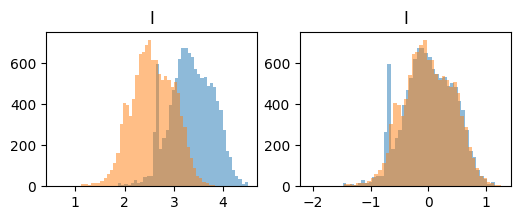

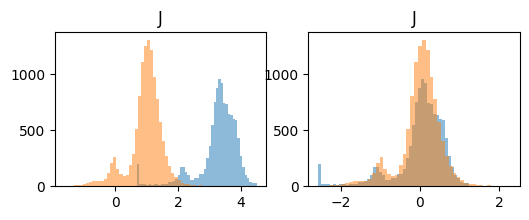

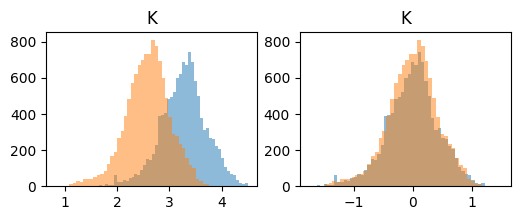

In [140]:
# plot hists for both df and df_res, as overlayed histograms
for col in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(6, 2))
    axes[0].set_title(col)
    axes[0].hist(df[col], alpha=0.5, label='df', bins=50)
    axes[0].hist(df_res[col], alpha=0.5, label='df_res', bins=50)
    axes[1].set_title(col)
    axes[1].hist(df[col] - df[col].mean(), alpha=0.5, label='df', bins=50)
    axes[1].hist(df_res[col] - df_res[col].mean(), alpha=0.5, label='df_res', bins=50)
    plt.show()

In [141]:
# calculate mse for every column of df_res
for col in df.columns:
    mse = np.mean(df_res[col]**2)
    print(col, mse)

A 0.8195943000762045
B 12.122050245403734
C 11.868321568087266
D 3.733083523684471
E 3.4054798096951946
F 0.4071426328341688
G 7.078951468480524
H 10.355679274819837
I 6.810046209388462
J 1.2168443365251342
K 6.845818055874323
